In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re

# Load the dataset 
movies1 = pd.read_csv('movies.csv')
movies = movies1[['title', 'genre', 'rating', 'runtime', 'votes', 'director', 'gross_earn']]
movies1.head()


,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn
0,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Shawshank Redemption,15,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,"('Tim Robbins',), ('Morgan Freeman',), ('Bob G...","26,26,905",$28.34M
1,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Dark Knight,12A,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,"('Christian Bale',), ('Heath Ledger',), ('Aaro...","25,98,173",$534.86M
2,https://m.media-amazon.com/images/S/sash/4Fyxw...,Inception,12A,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,Christopher Nolan,"('Leonardo DiCaprio',), ('Joseph Gordon-Levitt...","23,04,062",$292.58M
3,https://m.media-amazon.com/images/S/sash/4Fyxw...,Fight Club,18,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,David Fincher,"('Brad Pitt',), ('Edward Norton',), ('Meat Loa...","20,71,088",$37.03M
4,https://m.media-amazon.com/images/S/sash/4Fyxw...,Pulp Fiction,18,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"('John Travolta',), ('Uma Thurman',), ('Samuel...","20,11,013",$107.93M


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# runtime is formatted using avrage as a replacement for a null
total_runtime = 0
num_movies = 0
#predict gross earnings 
#director evpetice 10 movies > director
#certificae {looks at housing example in canelink bte}
for i in range(len(movies['runtime'])):
    try:
        runtime = int(movies['runtime'][i].replace(' min', ''))
        movies['runtime'][i] = runtime
        total_runtime += runtime
        num_movies += 1
    except ValueError:
        if num_movies == 0:
            movies['runtime'][i] = -1
        else:
            mean_runtime = total_runtime / num_movies
            movies['runtime'][i] = int(mean_runtime)


/var/folders/qh/81164_ks5gn9fq0dc70qm_fh0000gn/T/ipykernel_59329/788055161.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['runtime'][i] = runtime
/var/folders/qh/81164_ks5gn9fq0dc70qm_fh0000gn/T/ipykernel_59329/788055161.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['runtime'][i] = int(mean_runtime)


In [4]:
# formatt for genre
movies['genres_list'] = movies['genre'].str.split(', ')
movies['genres_list'] = movies['genres_list'].apply(lambda x: sorted(x) if isinstance(x, list) else [])
movies['genres_list'] = movies['genres_list'].apply(lambda x: x if x else ['Unknown'])


/var/folders/qh/81164_ks5gn9fq0dc70qm_fh0000gn/T/ipykernel_59329/399998552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['genres_list'] = movies['genre'].str.split(', ')
/var/folders/qh/81164_ks5gn9fq0dc70qm_fh0000gn/T/ipykernel_59329/399998552.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['genres_list'] = movies['genres_list'].apply(lambda x: sorted(x) if isinstance(x, list) else [])
/var/folders/qh/81164_ks5gn9fq0dc70qm_fh0000gn/T/ipykernel_59329/399998552.py:4: SettingWithCopyWa

In [5]:
movies.head(100)

,title,genre,rating,runtime,votes,director,gross_earn,genres_list
0,The Shawshank Redemption,Drama,9.3,142,"26,26,905",Frank Darabont,$28.34M,[Drama]
1,The Dark Knight,"Action, Crime, Drama",9.0,152,"25,98,173",Christopher Nolan,$534.86M,"[Action, Crime, Drama]"
2,Inception,"Action, Adventure, Sci-Fi",8.8,148,"23,04,062",Christopher Nolan,$292.58M,"[Action, Adventure, Sci-Fi]"
3,Fight Club,Drama,8.8,139,"20,71,088",David Fincher,$37.03M,[Drama]
4,Pulp Fiction,"Crime, Drama",8.9,154,"20,11,013",Quentin Tarantino,$107.93M,"[Crime, Drama]"
...,...,...,...,...,...,...,...,...
95,District 9,"Action, Sci-Fi, Thriller",7.9,112,"6,76,036",Neill Blomkamp,$115.65M,"[Action, Sci-Fi, Thriller]"
96,I Am Legend,"Action, Drama, Sci-Fi",7.2,101,"7,47,517",Francis Lawrence,$256.39M,"[Action, Drama, Sci-Fi]"
97,Catch Me If You Can,"Biography, Crime, Drama",8.1,141,"9,58,178",Steven Spielberg,$164.62M,"[Biography, Crime, Drama]"
98,Skyfall,"Action, Adventure, Thriller",7.8,143,"6,91,070",Sam Mendes,$304.36M,"[Action, Adventure, Thriller]"


In [6]:
#cleaning votes to float
movies['votes'] = movies['votes'].str.replace(',', '')
#movies = movies.dropna(subset=['votes'])
movies['votes'] = movies['votes'].str.replace(',', '').astype(float)


/var/folders/qh/81164_ks5gn9fq0dc70qm_fh0000gn/T/ipykernel_59329/313051277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['votes'] = movies['votes'].str.replace(',', '')
/var/folders/qh/81164_ks5gn9fq0dc70qm_fh0000gn/T/ipykernel_59329/313051277.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['votes'] = movies['votes'].str.replace(',', '').astype(float)


In [7]:
# formatting gross_earn
movies['gross_earn'] = movies['gross_earn'].str.replace('$', '').str.replace('M', '').astype(float) * 1e6

/var/folders/qh/81164_ks5gn9fq0dc70qm_fh0000gn/T/ipykernel_59329/2381397896.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies['gross_earn'] = movies['gross_earn'].str.replace('$', '').str.replace('M', '').astype(float) * 1e6
/var/folders/qh/81164_ks5gn9fq0dc70qm_fh0000gn/T/ipykernel_59329/2381397896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['gross_earn'] = movies['gross_earn'].str.replace('$', '').str.replace('M', '').astype(float) * 1e6


In [8]:
movies.dropna(subset=['gross_earn'], inplace=True)

/var/folders/qh/81164_ks5gn9fq0dc70qm_fh0000gn/T/ipykernel_59329/1503337091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.dropna(subset=['gross_earn'], inplace=True)


In [9]:

selected_columns = ['runtime', 'votes', 'gross_earn', 'rating']
movies_subset = movies[selected_columns]

print(movies_subset)


     runtime      votes   gross_earn  rating
0        142  2626905.0   28340000.0     9.3
1        152  2598173.0  534860000.0     9.0
2        148  2304062.0  292580000.0     8.8
3        139  2071088.0   37030000.0     8.8
4        154  2011013.0  107930000.0     8.9
...      ...        ...          ...     ...
4992      94    20309.0    6240000.0     6.2
4993     117    25669.0   23000000.0     6.3
4995     102    25112.0    9400000.0     7.3
4998      92    21536.0    6670000.0     7.0
4999     120    25097.0    8200000.0     7.6

[4585 rows x 4 columns]


In [10]:
movies1['certificate'].value_counts()

15           1843
12A           788
18            659
PG            614
U             362
12            278
A             186
X             134
AA             59
R              12
UA             11
PG-13          11
Not Rated       7
Rejected        5
90 min          3
106 min         2
104 min         2
99 min          2
114 min         2
70 min          1
142 min         1
103 min         1
89 min          1
112 min         1
102 min         1
98 min          1
116 min         1
119 min         1
170 min         1
140 min         1
(Banned)        1
87 min          1
124 min         1
107 min         1
97 min          1
93 min          1
100 min         1
137 min         1
144 min         1
Name: certificate, dtype: int64

In [11]:
valid_certificates = ['Film rated', '15', '12A', '18', 'PG', 'U', '12', 'A', 'X']
movies1 = movies1[movies1['certificate'].isin(valid_certificates)]

In [12]:
movies1_na = movies1.dropna(subset = ["certificate"])
movies1_na.shape

(4864, 11)

In [13]:
dummies = pd.get_dummies(movies1_na.certificate)
dummies.head()
movies1_na_dummies = pd.concat([movies1_na,dummies], axis = 'columns')
movies1_na_dummies.head()
movies1_clean = movies1_na_dummies.drop(['certificate','poster','about','stars'], axis = 'columns') #drop original column and observation column, the one with the lowest observations
movies1_clean.head()

,title,runtime,genre,rating,director,votes,gross_earn,12,12A,15,18,A,PG,U,X
0,The Shawshank Redemption,142 min,Drama,9.3,Frank Darabont,"26,26,905",$28.34M,0,0,1,0,0,0,0,0
1,The Dark Knight,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,"25,98,173",$534.86M,0,1,0,0,0,0,0,0
2,Inception,148 min,"Action, Adventure, Sci-Fi",8.8,Christopher Nolan,"23,04,062",$292.58M,0,1,0,0,0,0,0,0
3,Fight Club,139 min,Drama,8.8,David Fincher,"20,71,088",$37.03M,0,0,0,1,0,0,0,0
4,Pulp Fiction,154 min,"Crime, Drama",8.9,Quentin Tarantino,"20,11,013",$107.93M,0,0,0,1,0,0,0,0


In [14]:
director_exp = movies1['director'].value_counts()

In [15]:
movies1_clean['director_experience'] = movies1_clean.groupby('director')['title'].transform('count')

In [16]:
movies1_clean.head()

,title,runtime,genre,rating,director,votes,gross_earn,12,12A,15,18,A,PG,U,X,director_experience
0,The Shawshank Redemption,142 min,Drama,9.3,Frank Darabont,"26,26,905",$28.34M,0,0,1,0,0,0,0,0,4
1,The Dark Knight,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,"25,98,173",$534.86M,0,1,0,0,0,0,0,0,9
2,Inception,148 min,"Action, Adventure, Sci-Fi",8.8,Christopher Nolan,"23,04,062",$292.58M,0,1,0,0,0,0,0,0,9
3,Fight Club,139 min,Drama,8.8,David Fincher,"20,71,088",$37.03M,0,0,0,1,0,0,0,0,10
4,Pulp Fiction,154 min,"Crime, Drama",8.9,Quentin Tarantino,"20,11,013",$107.93M,0,0,0,1,0,0,0,0,9


In [17]:
movies1_clean['num_genres'] = movies1_clean['genre'].str.count(',')+1

In [18]:
movies1_clean.head()

,title,runtime,genre,rating,director,votes,gross_earn,12,12A,15,18,A,PG,U,X,director_experience,num_genres
0,The Shawshank Redemption,142 min,Drama,9.3,Frank Darabont,"26,26,905",$28.34M,0,0,1,0,0,0,0,0,4,1
1,The Dark Knight,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,"25,98,173",$534.86M,0,1,0,0,0,0,0,0,9,3
2,Inception,148 min,"Action, Adventure, Sci-Fi",8.8,Christopher Nolan,"23,04,062",$292.58M,0,1,0,0,0,0,0,0,9,3
3,Fight Club,139 min,Drama,8.8,David Fincher,"20,71,088",$37.03M,0,0,0,1,0,0,0,0,10,1
4,Pulp Fiction,154 min,"Crime, Drama",8.9,Quentin Tarantino,"20,11,013",$107.93M,0,0,0,1,0,0,0,0,9,2


In [19]:
movies1_clean['main_genre'] = movies1_clean['genre'].str.split(',').str[0]

In [20]:
movies1_clean.head()

,title,runtime,genre,rating,director,votes,gross_earn,12,12A,15,18,A,PG,U,X,director_experience,num_genres,main_genre
0,The Shawshank Redemption,142 min,Drama,9.3,Frank Darabont,"26,26,905",$28.34M,0,0,1,0,0,0,0,0,4,1,Drama
1,The Dark Knight,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,"25,98,173",$534.86M,0,1,0,0,0,0,0,0,9,3,Action
2,Inception,148 min,"Action, Adventure, Sci-Fi",8.8,Christopher Nolan,"23,04,062",$292.58M,0,1,0,0,0,0,0,0,9,3,Action
3,Fight Club,139 min,Drama,8.8,David Fincher,"20,71,088",$37.03M,0,0,0,1,0,0,0,0,10,1,Drama
4,Pulp Fiction,154 min,"Crime, Drama",8.9,Quentin Tarantino,"20,11,013",$107.93M,0,0,0,1,0,0,0,0,9,2,Crime


In [21]:
bins = [0, 1, 5, 10, movies1_clean['director_experience'].max()]
labels = ['1', '2', '3', '4']

movies1_clean['director_level'] = pd.cut(movies1_clean['director_experience'], bins=bins, labels=labels)

In [22]:
movies1_clean.head()

,title,runtime,genre,rating,director,votes,gross_earn,12,12A,15,18,A,PG,U,X,director_experience,num_genres,main_genre,director_level
0,The Shawshank Redemption,142 min,Drama,9.3,Frank Darabont,"26,26,905",$28.34M,0,0,1,0,0,0,0,0,4,1,Drama,2
1,The Dark Knight,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,"25,98,173",$534.86M,0,1,0,0,0,0,0,0,9,3,Action,3
2,Inception,148 min,"Action, Adventure, Sci-Fi",8.8,Christopher Nolan,"23,04,062",$292.58M,0,1,0,0,0,0,0,0,9,3,Action,3
3,Fight Club,139 min,Drama,8.8,David Fincher,"20,71,088",$37.03M,0,0,0,1,0,0,0,0,10,1,Drama,3
4,Pulp Fiction,154 min,"Crime, Drama",8.9,Quentin Tarantino,"20,11,013",$107.93M,0,0,0,1,0,0,0,0,9,2,Crime,3


In [23]:
movies1_clean['runtime'] = movies1_clean['runtime'].astype(str).str.replace(' min', '').astype(float)
movies1_clean['votes'] = movies1_clean['votes'].astype(str).str.replace(',', '').astype(float)

In [24]:
movies1_clean = movies1_clean.rename(columns={'gross_earn': 'gross_earn_millions'})


In [25]:
movies1_clean['gross_earn_millions'] = movies1_clean['gross_earn_millions'].apply(lambda x: float(x.replace('$', '').replace('M', '000000')) if isinstance(x, str) else x)


In [26]:
movies1_clean.head()

,title,runtime,genre,rating,director,votes,gross_earn_millions,12,12A,15,18,A,PG,U,X,director_experience,num_genres,main_genre,director_level
0,The Shawshank Redemption,142.0,Drama,9.3,Frank Darabont,2626905.0,28.34,0,0,1,0,0,0,0,0,4,1,Drama,2
1,The Dark Knight,152.0,"Action, Crime, Drama",9.0,Christopher Nolan,2598173.0,534.86,0,1,0,0,0,0,0,0,9,3,Action,3
2,Inception,148.0,"Action, Adventure, Sci-Fi",8.8,Christopher Nolan,2304062.0,292.58,0,1,0,0,0,0,0,0,9,3,Action,3
3,Fight Club,139.0,Drama,8.8,David Fincher,2071088.0,37.03,0,0,0,1,0,0,0,0,10,1,Drama,3
4,Pulp Fiction,154.0,"Crime, Drama",8.9,Quentin Tarantino,2011013.0,107.93,0,0,0,1,0,0,0,0,9,2,Crime,3


In [27]:
movies1_clean.shape

(4864, 19)

In [28]:
movies1_clean.dropna(subset=['gross_earn_millions'], inplace=True)

In [29]:
selected_columns = ['runtime', 'votes', 'gross_earn_millions', 'rating']
movies2_clean = movies1_clean[selected_columns]

print(movies2_clean)

      runtime      votes  gross_earn_millions  rating
0       142.0  2626905.0                28.34     9.3
1       152.0  2598173.0               534.86     9.0
2       148.0  2304062.0               292.58     8.8
3       139.0  2071088.0                37.03     8.8
4       154.0  2011013.0               107.93     8.9
...       ...        ...                  ...     ...
4992     94.0    20309.0                 6.24     6.2
4993    117.0    25669.0                23.00     6.3
4995    102.0    25112.0                 9.40     7.3
4998     92.0    21536.0                 6.67     7.0
4999    120.0    25097.0                 8.20     7.6

[4483 rows x 4 columns]


In [30]:
X = movies2_clean.drop(columns = ['gross_earn_millions'])
X.head()
y = movies2_clean['gross_earn_millions']
y.head()

0     28.34
1    534.86
2    292.58
3     37.03
4    107.93
Name: gross_earn_millions, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1984)

In [32]:
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()

OLS.fit(X_train, y_train)

LinearRegression()

In [33]:
print('Intercept is ' + str(OLS.intercept_))
print('The set of coefficients are ' + str(OLS.coef_))
print("The R-Squared value is " + str(OLS.score(X_train, y_train)))

Intercept is 83.23899840384124
The set of coefficients are [ 2.22167851e-01  2.01805782e-04 -1.32913659e+01]
The R-Squared value is 0.3788280608793311


In [34]:
y_pred = OLS.predict(X_test)
performance = pd.DataFrame({"PREDICTIONS": y_pred, "ACTUAL VALUES": y_test})
performance['ERROR'] = performance['ACTUAL VALUES'] - performance['PREDICTIONS']
performance.head()

,PREDICTIONS,ACTUAL VALUES,ERROR
4795,56.701975,368.38,311.678025
4191,22.929110,35.11,12.180890
334,95.128456,125.32,30.191544
4499,35.662334,14.45,-21.212334
2516,26.580502,17.28,-9.300502


In [35]:
performance.reset_index(drop = True, inplace = True)
performance.reset_index(inplace = True)
performance.head()

,index,PREDICTIONS,ACTUAL VALUES,ERROR
0,0,56.701975,368.38,311.678025
1,1,22.929110,35.11,12.180890
2,2,95.128456,125.32,30.191544
3,3,35.662334,14.45,-21.212334
4,4,26.580502,17.28,-9.300502


Text(0, 0.5, 'Residuals')

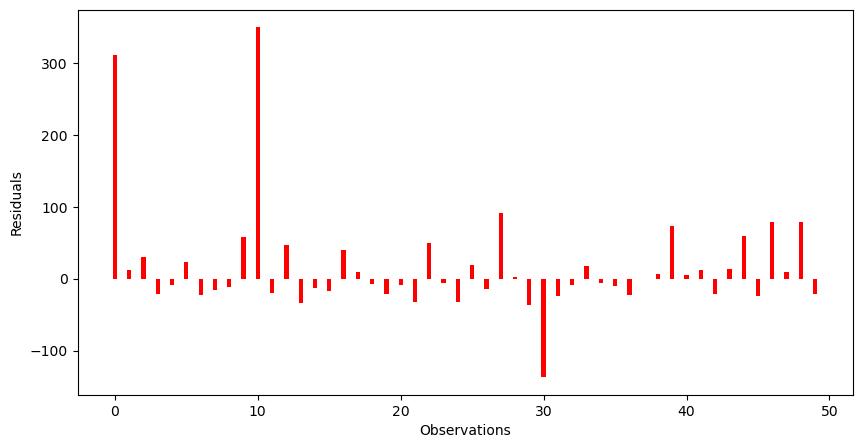

In [36]:
fig = plt.figure(figsize = (10,5))
plt.bar('index', 'ERROR', data = performance[:50], color = 'red', width = 0.3)
plt.xlabel("Observations")
plt.ylabel("Residuals")

In [37]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
nicerOLS = sm.OLS(y_train, X_train).fit()
nicerOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     gross_earn_millions   R-squared:                       0.379
Model:                             OLS   Adj. R-squared:                  0.378
Method:                  Least Squares   F-statistic:                     728.2
Date:                 Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                         18:46:58   Log-Likelihood:                -19305.
No. Observations:                 3586   AIC:                         3.862e+04
Df Residuals:                     3582   BIC:                         3.864e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.2390      7.092     11.738      0.000      69.335      97.143
runtime        0.2222      0.047      4.702      0.000       0.130       0.315
votes          0.0002   4.53e-06     44.505      0.000       0.000       0.000
rating       -13.2914      1.046    -12.704      0.000     -15.343     -11.240
==============================================================================
Omnibus:                     1600.721   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30427.125
Skew:                           1.650   Prob(JB):                         0.00
Kurtosis:                      16.883   Cond. No.                     2.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
selected_columns = ['runtime', 'votes', 'gross_earn_millions', 'rating', '12', '12A', '15', '18', 'A', 'PG', 'U', 'X', 'director_level']
movies3_clean = movies1_clean[selected_columns]

print(movies3_clean)
movies3_clean.head()

      runtime      votes  gross_earn_millions  rating  12  12A  15  18  A  PG  \
0       142.0  2626905.0                28.34     9.3   0    0   1   0  0   0   
1       152.0  2598173.0               534.86     9.0   0    1   0   0  0   0   
2       148.0  2304062.0               292.58     8.8   0    1   0   0  0   0   
3       139.0  2071088.0                37.03     8.8   0    0   0   1  0   0   
4       154.0  2011013.0               107.93     8.9   0    0   0   1  0   0   
...       ...        ...                  ...     ...  ..  ...  ..  .. ..  ..   
4992     94.0    20309.0                 6.24     6.2   1    0   0   0  0   0   
4993    117.0    25669.0                23.00     6.3   0    0   0   0  0   0   
4995    102.0    25112.0                 9.40     7.3   0    0   0   0  0   0   
4998     92.0    21536.0                 6.67     7.0   0    0   0   0  0   1   
4999    120.0    25097.0                 8.20     7.6   0    0   0   0  0   0   

      U  X director_level  

,runtime,votes,gross_earn_millions,rating,12,12A,15,18,A,PG,U,X,director_level
0,142.0,2626905.0,28.34,9.3,0,0,1,0,0,0,0,0,2
1,152.0,2598173.0,534.86,9.0,0,1,0,0,0,0,0,0,3
2,148.0,2304062.0,292.58,8.8,0,1,0,0,0,0,0,0,3
3,139.0,2071088.0,37.03,8.8,0,0,0,1,0,0,0,0,3
4,154.0,2011013.0,107.93,8.9,0,0,0,1,0,0,0,0,3


In [39]:
movies1_clean.head()

,title,runtime,genre,rating,director,votes,gross_earn_millions,12,12A,15,18,A,PG,U,X,director_experience,num_genres,main_genre,director_level
0,The Shawshank Redemption,142.0,Drama,9.3,Frank Darabont,2626905.0,28.34,0,0,1,0,0,0,0,0,4,1,Drama,2
1,The Dark Knight,152.0,"Action, Crime, Drama",9.0,Christopher Nolan,2598173.0,534.86,0,1,0,0,0,0,0,0,9,3,Action,3
2,Inception,148.0,"Action, Adventure, Sci-Fi",8.8,Christopher Nolan,2304062.0,292.58,0,1,0,0,0,0,0,0,9,3,Action,3
3,Fight Club,139.0,Drama,8.8,David Fincher,2071088.0,37.03,0,0,0,1,0,0,0,0,10,1,Drama,3
4,Pulp Fiction,154.0,"Crime, Drama",8.9,Quentin Tarantino,2011013.0,107.93,0,0,0,1,0,0,0,0,9,2,Crime,3


In [40]:
print(movies1_clean['main_genre'].unique())

['Drama' 'Action' 'Crime' 'Adventure' 'Biography' 'Mystery' 'Animation'
 'Comedy' 'Sci-Fi' 'Horror' 'Fantasy' 'Romance' 'Western' 'Family'
 'Film-Noir' 'Thriller']


In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [42]:
genre_map = {'Action': 1, 'Adventure': 2, 'Animation': 3, 'Biography': 4, 'Comedy': 5, 'Crime': 6, 'Documentary': 7, 'Drama': 8, 'Family': 9, 'Fantasy': 10, 'History': 11, 'Horror': 12, 'Music': 13, 'Musical': 14, 'Mystery': 15, 'Romance': 16, 'Sci-Fi': 17, 'Sport': 18, 'Thriller': 19, 'War': 20, 'Western': 21}
movies1_clean['main_genre'] = movies1_clean['main_genre'].map(genre_map)


In [43]:
movies1_clean.head()

,title,runtime,genre,rating,director,votes,gross_earn_millions,12,12A,15,18,A,PG,U,X,director_experience,num_genres,main_genre,director_level
0,The Shawshank Redemption,142.0,Drama,9.3,Frank Darabont,2626905.0,28.34,0,0,1,0,0,0,0,0,4,1,8.0,2
1,The Dark Knight,152.0,"Action, Crime, Drama",9.0,Christopher Nolan,2598173.0,534.86,0,1,0,0,0,0,0,0,9,3,1.0,3
2,Inception,148.0,"Action, Adventure, Sci-Fi",8.8,Christopher Nolan,2304062.0,292.58,0,1,0,0,0,0,0,0,9,3,1.0,3
3,Fight Club,139.0,Drama,8.8,David Fincher,2071088.0,37.03,0,0,0,1,0,0,0,0,10,1,8.0,3
4,Pulp Fiction,154.0,"Crime, Drama",8.9,Quentin Tarantino,2011013.0,107.93,0,0,0,1,0,0,0,0,9,2,6.0,3


In [44]:
selected_columns = ['runtime', 'votes', 'gross_earn_millions', 'rating', '12', '12A', '15', '18', 'A', 'PG', 'U', 'X', 'director_experience', 'num_genres', 'main_genre', 'director_level']
movies_rf = movies1_clean[selected_columns]

movies_rf.head()

,runtime,votes,gross_earn_millions,rating,12,12A,15,18,A,PG,U,X,director_experience,num_genres,main_genre,director_level
0,142.0,2626905.0,28.34,9.3,0,0,1,0,0,0,0,0,4,1,8.0,2
1,152.0,2598173.0,534.86,9.0,0,1,0,0,0,0,0,0,9,3,1.0,3
2,148.0,2304062.0,292.58,8.8,0,1,0,0,0,0,0,0,9,3,1.0,3
3,139.0,2071088.0,37.03,8.8,0,0,0,1,0,0,0,0,10,1,8.0,3
4,154.0,2011013.0,107.93,8.9,0,0,0,1,0,0,0,0,9,2,6.0,3


In [45]:
movies_rf.dtypes

runtime                 float64
votes                   float64
gross_earn_millions     float64
rating                  float64
12                        uint8
12A                       uint8
15                        uint8
18                        uint8
A                         uint8
PG                        uint8
U                         uint8
X                         uint8
director_experience       int64
num_genres                int64
main_genre              float64
director_level         category
dtype: object

In [46]:
movies_rf.dropna(inplace=True)

/var/folders/qh/81164_ks5gn9fq0dc70qm_fh0000gn/T/ipykernel_59329/1344905347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_rf.dropna(inplace=True)


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(movies_rf.drop('gross_earn_millions', 1), movies_rf['gross_earn_millions'], test_size=0.2, random_state=1984)


/var/folders/qh/81164_ks5gn9fq0dc70qm_fh0000gn/T/ipykernel_59329/773963775.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(movies_rf.drop('gross_earn_millions', 1), movies_rf['gross_earn_millions'], test_size=0.2, random_state=1984)


In [48]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

train_data_score = tree.score(X_train, y_train)
test_data_score = tree.score(X_test, y_test)

print("Training data score: ", train_data_score)
print("Test data score: ", test_data_score)


Training data score:  1.0
Test data score:  0.3087403400841886


In [49]:
tree2 = DecisionTreeRegressor(max_depth = 8)
tree2.fit(X_train, y_train)

train_data_score = tree2.score(X_train, y_train)
test_data_score = tree2.score(X_test, y_test)

print("Training data score: ", train_data_score)
print("Test data score: ", test_data_score)

Training data score:  0.753741738393543
Test data score:  0.5457649985714974


In [50]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=10, random_state=1984)
forest.fit(X_train, y_train)

train_data_score = forest.score(X_train, y_train)
test_data_score = forest.score(X_test, y_test)

print("Training data score: ", train_data_score)
print("Test data score: ", test_data_score)


Training data score:  0.9245942669628149
Test data score:  0.582407231636417


In [95]:
from sklearn.ensemble import GradientBoostingRegressor

gbtree = GradientBoostingRegressor(learning_rate = 0.3, max_depth = 2, random_state = 1984)
gbtree.fit(X_train, y_train)

y_pred = gbtree.predict(X_test)

In [96]:
train_data_score = gbtree.score(X_train, y_train)
test_data_score = gbtree.score(X_test, y_test)

print("Training data score: ", train_data_score)
print("Test data score: ", test_data_score)

Training data score:  0.7435101235187883
Test data score:  0.6617356154391785


In [97]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


/Users/filipe/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(
/Users/filipe/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [98]:
train_data_score = knn.score(X_train, y_train)
test_data_score = knn.score(X_test, y_test)

print("Training data score: ", train_data_score)
print("Test data score: ", test_data_score)

Training data score:  0.5156072750680323
Test data score:  0.33429913378824494


/Users/filipe/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/Users/filipe/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
